<h1><center> Predicting Ice Cream Revenue for Frosty Forecasts Ice Cream Co.</center></h1>

<p align="justify">This project aims to enhance the machine learning tool for Frosty Forecasts Ice Cream Co., expanding its capabilities to predict daily revenue not only based on outside temperature but also incorporating seasonal trends. By utilizing a comprehensive dataset that includes historical data on temperature, revenue, and additional seasonal indicators such as month, day of the week, and holidays, the enhanced model will employ linear regression and gradient descent to model these complex relationships. The primary goal is to refine Frosty Forecasts Ice Cream Co.'s decision-making process regarding the deployment of ice cream trucks, optimizing operations to target the most profitable days more accurately. This refined predictive capability aims to boost operational efficiency, reduce costs, and increase revenue more effectively, thereby supporting the company’s broader success in a dynamic market environment.</p>

<h2><center>Exploratory Data Analysis</center></h2>

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

df = pd.read_csv('./data/ice_cream_truck_revenue_with_seasonality.csv')
df['date'] = pd.to_datetime(df['date'])
X = df.drop('revenue', axis=1)
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

df.describe()

,date,temperature,revenue,month,day_of_week,day_of_year,week_of_year,is_holiday,rolling_temp_avg,temp_difference,month_sin,month_cos,day_of_week_sin,day_of_week_cos
count,501,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,2024-09-07 00:00:00.000000256,79.758044,480.038124,5.506986,2.988024,152.377246,22.067864,0.001996,79.850958,-0.037365,0.205848,0.024930,0.004372,0.000998
min,2024-01-01 00:00:00,60.200000,244.200000,1.000000,0.000000,1.000000,1.000000,0.000000,68.020000,-34.150000,-1.000000,-1.000000,-0.974900,-0.901000
25%,2024-05-05 00:00:00,69.580000,379.260000,3.000000,1.000000,63.000000,9.000000,0.000000,76.290000,-11.480000,-0.500000,-0.500000,-0.781800,-0.901000
50%,2024-09-07 00:00:00,80.430000,468.540000,5.000000,3.000000,126.000000,18.000000,0.000000,79.520000,-0.390000,0.500000,0.000000,0.000000,-0.222500
75%,2025-01-10 00:00:00,89.860000,573.390000,8.000000,5.000000,241.000000,35.000000,0.000000,83.050000,11.250000,0.866000,0.500000,0.781800,0.623500
max,2025-05-15 00:00:00,99.880000,813.520000,12.000000,6.000000,366.000000,52.000000,1.000000,91.900000,37.970000,1.000000,1.000000,0.974900,1.000000
std,NaN,11.743018,126.469257,3.455785,2.000964,105.889562,15.001179,0.044677,4.564323,16.168689,0.703225,0.681441,0.707429,0.708178


<h3>Histogram Analysis of Temperature and Revenue Data</h3>

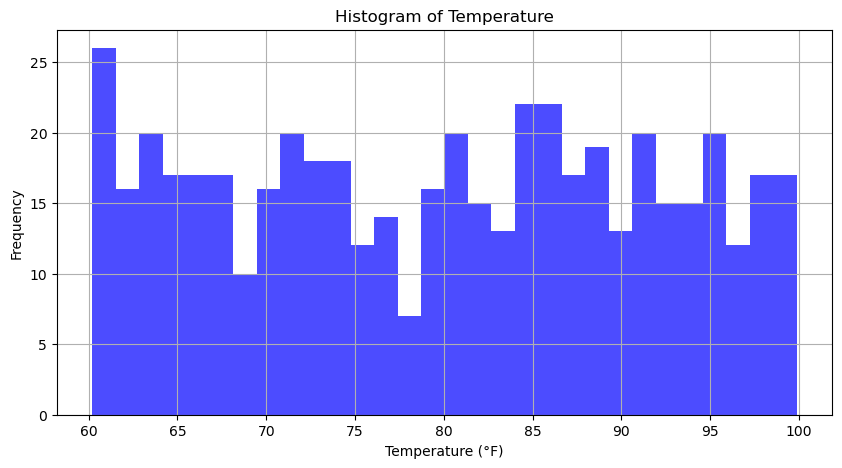

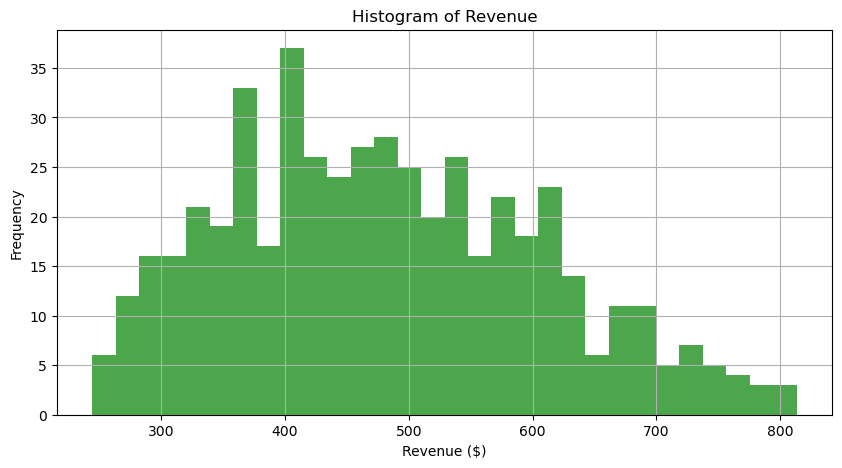

In [27]:
# Plot histogram for Temperature
plt.figure(figsize=(10, 5))
plt.hist(df['temperature'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for Revenue
plt.figure(figsize=(10, 5))
plt.hist(df['revenue'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<p align="justify">The histograms above provide a visual representation of the distribution of temperatures and revenues for the ice cream truck business, which is crucial for understanding the factors influencing sales. The temperature histogram helps identify common weather conditions, potentially indicating days with higher sales volumes, while the revenue histogram reveals the sales figures' spread over the observed period. Analyzing these distributions assists in forecasting sales and strategizing business operations, highlighting the variability and central tendencies that are vital for predictive modeling and maximizing profitability.</p>

<h3>Line Graph Analysis of Temperature and Revenue Trends Over Time</h3>

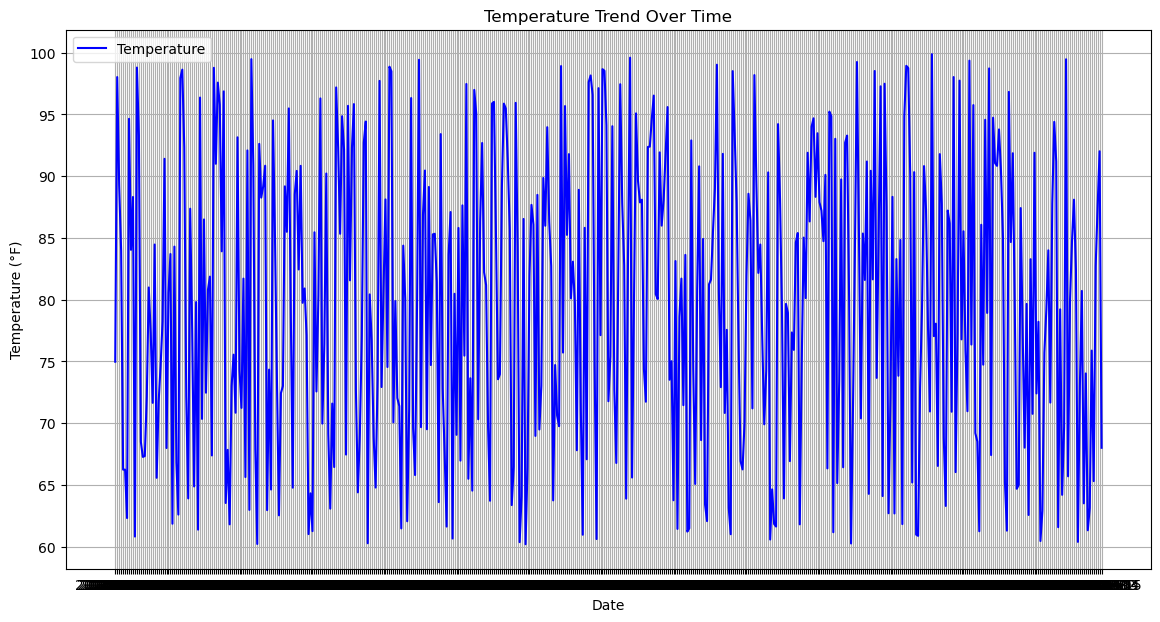

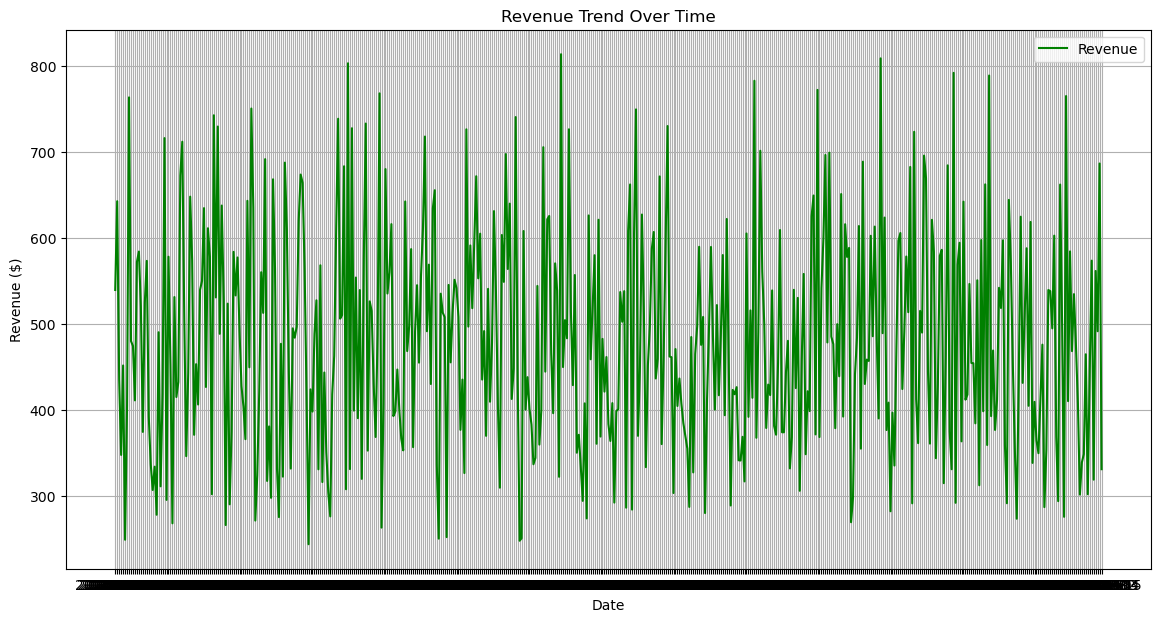

In [36]:
# Plot line graph for Temperature vs. Date
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['temperature'], color='blue', label='Temperature')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()

# Plot line graph for Revenue vs. Date
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['revenue'], color='green', label='Revenue')
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.legend()
plt.show()

<p align="justify">The line graphs above provide a detailed view of how temperature and revenue fluctuate throughout the observation period. The temperature trend line helps identify periods with significant warmth that likely correlate with increased ice cream sales. Observing these patterns allows us to predict potential spikes in demand based on seasonal temperature changes. Conversely, the revenue trend line directly illustrates the sales performance over time, highlighting peak periods, possible sales slumps, and any unexpected fluctuations. Together, these visualizations are crucial for assessing the temporal dynamics of the business, offering insights into how external conditions like weather and seasonality affect sales. This analysis supports strategic planning and forecasting by pinpointing optimal times for resource allocation and promotional efforts, ultimately aiming to enhance profitability and operational efficiency.</p>

<h3>Heatmap Analysis of Feature Correlations</h3>

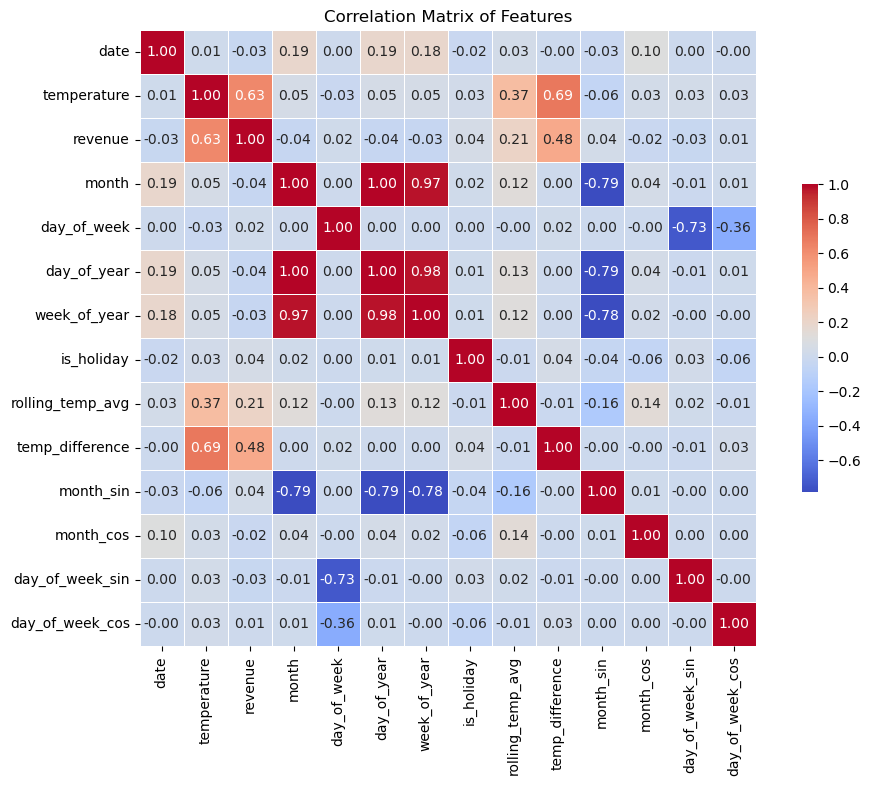

In [47]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

<p align="justify">The heatmap displayed above provides a visual representation of the correlation coefficients between all pairs of features within our dataset. Each cell in the heatmap shows the correlation value between two features, where the color intensity reflects the strength and the sign (positive or negative) of the correlation. Positive correlations are shown in warmer tones (red), indicating that as one feature increases, the other also tends to increase. Conversely, cooler tones (blue) denote negative correlations, suggesting that as one feature increases, the other decreases.

This analysis is crucial for identifying relationships that can influence model performance and data interpretation. For instance, a high positive correlation between temperature and revenue supports our hypothesis that warmer days lead to higher ice cream sales. On the other hand, identifying highly correlated independent features is important for avoiding multicollinearity in regression models, which can distort the estimated coefficients. By understanding these relationships, we can make informed decisions about feature selection and engineering to improve model accuracy and reliability.</p>

<h2><center>Linear Regression</center></h2>